# Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import requests
import random
from PIL import Image
from io import BytesIO

In [96]:
# Our data has already been downloaded
!ls -l

total 20592
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga      498 Sep  7 13:36  CITEME.txt
drwxrwxrwx 1 johnbaguinaga johnbaguinaga     4096 Dec  2 22:06 'bad images'
drwxrwxrwx 1 johnbaguinaga johnbaguinaga     4096 Dec 12 08:17 'downloaded images'
drwxrwxrwx 1 johnbaguinaga johnbaguinaga     4096 Dec  2 21:57 'downloaded images - Original Copy'
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga   280470 Sep  7 13:36  eml.xml
drwxrwxrwx 1 johnbaguinaga johnbaguinaga     4096 Sep 21 12:10 'empty data'
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga  1533490 Dec 12 08:26  image_preprocessing.ipynb
drwxrwxrwx 1 johnbaguinaga johnbaguinaga     4096 Dec 12 08:17  images
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga   460731 Sep  7 13:36  measurementOrFact.csv
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga    13452 Sep  7 13:36  meta.xml
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga    14272 Dec 12 08:27  model_development.ipynb
-rwxrwxrwx 1 johnbaguinaga johnbaguinaga  5408290 Sep  7 16:38  multimedia.csv
-rwxrwxrwx 1 johnbag

# Downloading Data


- Search for our target species (***Ericameria nauseosa***) using "Scientific Name" and download specimen data: https://intermountainbiota.org/portal/collections/harvestparams.php
  <br/><br/>
- 5 excel tables will be provided:
    - identifications.csv
    - materialSample.csv
    - measurementOrFact.csv
    - multimedia.csv
    - occurences.csv
    <br/><br/>
- Two things we need to figure out:
    1. How many **specimens** across all tables are **labeled** with their respective phenological stage (i.e. Flowering, Not flowering, Blossoming)?  
    2. How many of our **labeled specimens** have images (provided from *multimedia.csv*)?

# Exploring Excel Files


In [97]:
# Encoding must be set to "ISO-8859-1" in order to be read into DataFrame, otherwise will produce an error
df = pd.read_csv('occurrences.csv', encoding = "ISO-8859-1")
print(df)

             id institutionCode   collectionCode ownerInstitutionCode  \
0         91069            NMCR              NaN                  NaN   
1         91079            NMCR              NaN                  NaN   
2        101418            ENMU              NaN                  NaN   
3        101419            ENMU              NaN                  NaN   
4        101420            ENMU              NaN                  NaN   
...         ...             ...              ...                  ...   
13882  31408788            CINC              NaN                  NaN   
13883  31409033            CINC              NaN                  NaN   
13884  31412640             LSU  Vascular Plants                  NaN   
13885  31424416              UT           Botany                  NaN   
13886  31434981            ALAM              NaN                  NaN   

           basisOfRecord                          occurrenceID  \
0      PreservedSpecimen                                 

/home/johnbaguinaga/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (57,60,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [98]:
df.head()

,id,institutionCode,collectionCode,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,otherCatalogNumbers,higherClassification,kingdom,...,verbatimDepth,verbatimElevation,disposition,language,recordEnteredBy,modified,sourcePrimaryKey-dbpk,collID,recordID,references
0,91069,NMCR,NaN,NaN,PreservedSpecimen,NaN,9551,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,ft.,NaN,NaN,NaN,1991-01-28 00:00:00,9551,23,1d8086ed-5918-465f-8b89-a75dcb4dbbf3,https://intermountainbiota.org/portal/collecti...
1,91079,NMCR,NaN,NaN,PreservedSpecimen,NaN,10353,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,ft.,NaN,NaN,NaN,1989-09-28 00:00:00,10353,23,372d33ef-0d0a-4f8d-8013-afb593df7c93,https://intermountainbiota.org/portal/collecti...
2,101418,ENMU,NaN,NaN,PreservedSpecimen,1b95e7a4-46a6-4d71-bd98-ab14acc062e1,3789,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,4500ft.,NaN,NaN,NaN,2003-08-19 01:00:00,3789,24,1b95e7a4-46a6-4d71-bd98-ab14acc062e1,https://intermountainbiota.org/portal/collecti...
3,101419,ENMU,NaN,NaN,PreservedSpecimen,89363aae-119b-4c9f-8c4b-b76c59eaf01b,3790,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,4500ft.,NaN,NaN,NaN,2003-08-19 01:00:00,3790,24,89363aae-119b-4c9f-8c4b-b76c59eaf01b,https://intermountainbiota.org/portal/collecti...
4,101420,ENMU,NaN,NaN,PreservedSpecimen,2135e2b4-d1a5-4688-a760-b9160d10ab2e,3791,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2003-08-19 01:00:00,3791,24,2135e2b4-d1a5-4688-a760-b9160d10ab2e,https://intermountainbiota.org/portal/collecti...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13887 entries, 0 to 13886
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13887 non-null  int64  
 1   institutionCode                 13887 non-null  object 
 2   collectionCode                  6581 non-null   object 
 3   ownerInstitutionCode            3309 non-null   object 
 4   basisOfRecord                   13863 non-null  object 
 5   occurrenceID                    12273 non-null  object 
 6   catalogNumber                   11718 non-null  object 
 7   otherCatalogNumbers             4819 non-null   object 
 8   higherClassification            13876 non-null  object 
 9   kingdom                         13876 non-null  object 
 10  phylum                          13876 non-null  object 
 11  class                           0 non-null      float64
 12  order                           

In [100]:
# Looking to see if instance in "occurences.csv" matches one of the first results from the Herbarium website
# NOTE: 'id' in excel file corresponds to 'Symbiota ID' in website

instance1df = df.loc[df['id'] == 29990344]


# 'With' allows us to pass through code under a condition for our dataframe
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(instance1df)

,id,institutionCode,collectionCode,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,otherCatalogNumbers,higherClassification,kingdom,phylum,class,order,family,scientificName,taxonID,scientificNameAuthorship,genus,subgenus,specificEpithet,verbatimTaxonRank,infraspecificEpithet,taxonRank,identifiedBy,dateIdentified,identificationReferences,identificationRemarks,taxonRemarks,identificationQualifier,typeStatus,recordedBy,associatedCollectors,recordNumber,eventDate,eventDate2,year,month,day,startDayOfYear,endDayOfYear,verbatimEventDate,occurrenceRemarks,habitat,substrate,verbatimAttributes,fieldNumber,eventID,informationWithheld,dataGeneralizations,dynamicProperties,associatedOccurrences,associatedSequences,associatedTaxa,reproductiveCondition,establishmentMeans,cultivationStatus,lifeStage,sex,individualCount,preparations,locationID,continent,waterBody,islandGroup,island,country,stateProvince,county,municipality,locality,locationRemarks,localitySecurity,localitySecurityReason,decimalLatitude,decimalLongitude,geodeticDatum,coordinateUncertaintyInMeters,verbatimCoordinates,georeferencedBy,georeferenceProtocol,georeferenceSources,georeferenceVerificationStatus,georeferenceRemarks,minimumElevationInMeters,maximumElevationInMeters,minimumDepthInMeters,maximumDepthInMeters,verbatimDepth,verbatimElevation,disposition,language,recordEnteredBy,modified,sourcePrimaryKey-dbpk,collID,recordID,references
13436,29990344,PH,NaN,NaN,PreservedSpecimen,d6ac5f61-7a71-46c3-9a07-72b5498fc794,PH00171192,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,Magnoliophyta,NaN,Asterales,Asteraceae,Chrysothamnus nauseosus,31726.0,(Pallas) Britt.,Chrysothamnus,NaN,nauseosus,NaN,NaN,Species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Andrew Townesmith; Karen M. Meyer, Tracy Scott",NaN,712,2007-03-24,NaN,2007.0,3.0,24.0,83.0,NaN,2007-3-24,"subshrub to 2 m, stems gray white, leaves grey...",open pine oak forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,herbariumSpecimenDuplicate: https://intermount...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,California,Ventura,NaN,"Los Padres National Forest, border of Ojai and...",NaN,NaN,NaN,34.648889,-119.385556,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,1573.0,NaN,NaN,NaN,NaN,5160 ft,NaN,NaN,NaN,2018-04-19 16:14:47,267735,277,d6ac5f61-7a71-46c3-9a07-72b5498fc794,https://intermountainbiota.org/portal/collecti...


In [101]:
len(df.iloc[:,8])

13887

In [102]:
print(df['reproductiveCondition'].unique())

[nan 'fruit' 'flowers & fruit' 'flowers' 'sterile' 'Flowering' 'flo'
 'Unknown' 'fl. & fr.' 'fru' 'veg' 'Flowering & Fruiting' 'Fruiting'
 'Sterile' 'Buds' 'Buds only' 'Fertile' 'Remnants' 'Reproductive'
 'flower & fruit' 'flowering' 'flowering and fruiting' 'fruiting'
 'vegetative' 'buds' 'Vegetative' 'flower' 'flw' 'ff' 'Budding' 'Flowers'
 'Flower & Fruit' 'Flower' 'flower and fruit' 'in bloom, fruit-bearing'
 'fruit-bearing' 'Fruit' 'Flower.' 'In bloom, fruit-bearing'
 'Flowering and Fruiting' 'Flowering and Fruiting.'
 'Fruiting and flowering' 'Flowering.' 'flowers and fruit'
 'Flower and fruit' 'Early-flower.' 'bud' 'Past fruiting' 'fruiting?'
 'Flowering & fruiting' 'fl-fr' 'fl' 'fr' 'fl buds' 'Mid-flower.' 'fruits'
 'flowers and fruits' 'Flr & Frt' 'Frt' 'Flr' 'Veg' 'Flowers budding' 'Fl'
 'Flowering or fruiting'
 'Some individuals flowering, some with fruit developing, some with fruit developed and dispersing'
 'Mature/ Immature Seed/Flowering' 'Fruiting.' 'fl, v' 'v, fl' 'v,f

In [103]:
pd.set_option('display.max_rows', 125)

In [104]:
print("reproductiveCondition: 5307 non-null")
print("reproductiveCondition: 689  NotDetermined")

reproductiveCondition: 5307 non-null
reproductiveCondition: 689  NotDetermined


In [105]:
# From occurences.csv, in the "reproductiveCondition" column we have 5307 not null values and since 689 are "NotDetermined"
# we get (5307 - 689) = 4618 instances that have a useful label.

In [106]:
# We look for all unique inputs in "reproductiveCondition" and their respective count:

rc_counts = df['reproductiveCondition'].value_counts(ascending=False)
df['reproductiveCondition'].value_counts(ascending=False)

flowers                                                                                             791
flowering                                                                                           748
NotDetermined                                                                                       689
flowering and fruiting                                                                              662
Flowering                                                                                           411
Flowering & Fruiting                                                                                177
fruiting                                                                                            136
Flowers Present                                                                                     124
FL                                                                                                  124
Flr & Frt                                                       

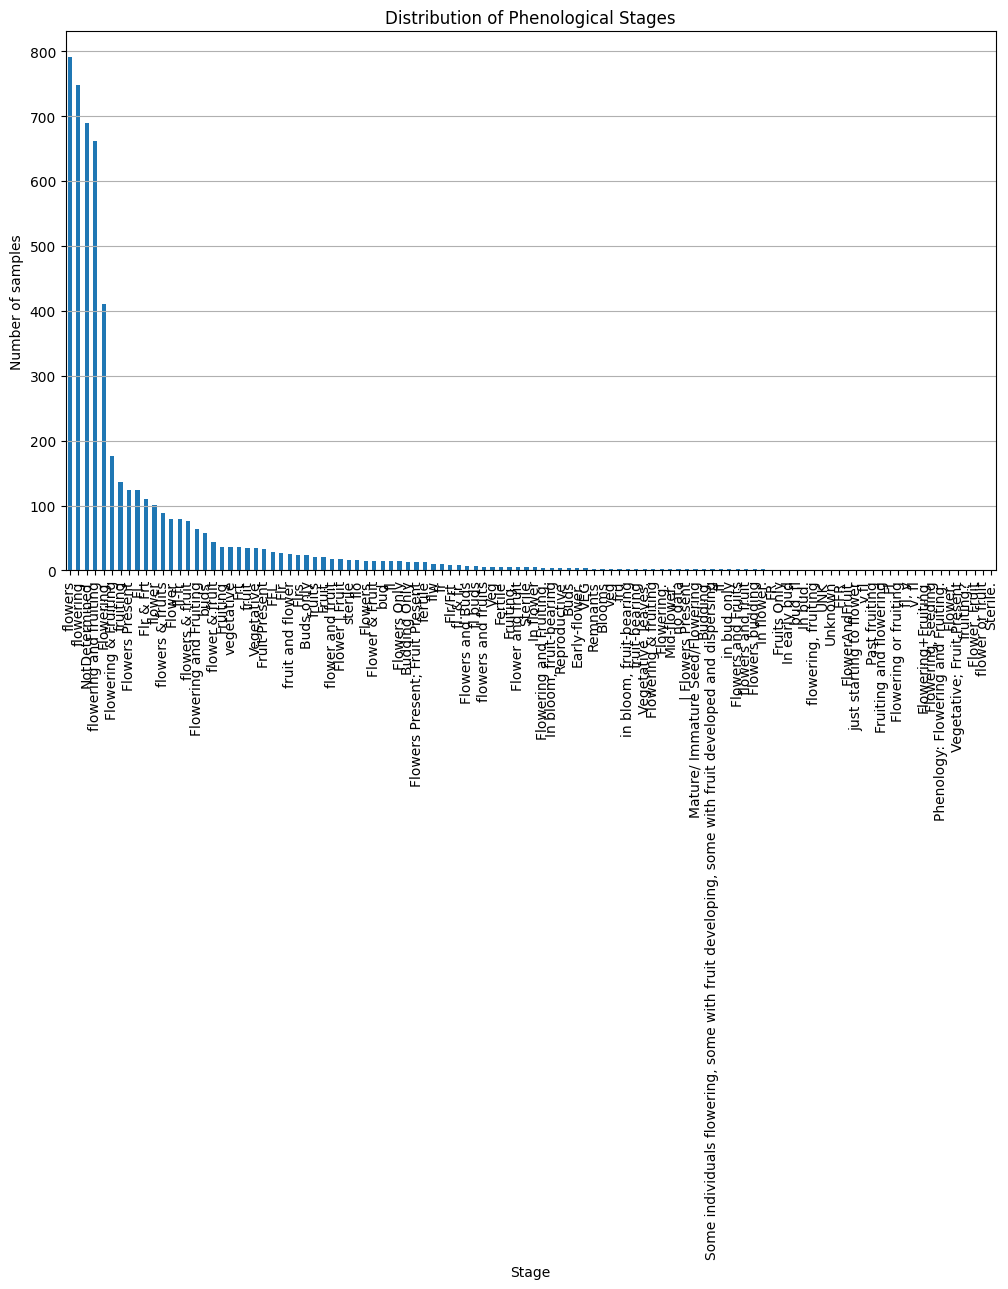

In [107]:
plt.figure(figsize=(12,7))
rc_counts.plot(kind='bar')
plt.title('Distribution of Phenological Stages')
plt.xlabel('Stage')
plt.ylabel('Number of samples')
plt.grid(axis='y')

plt.show()

# Determining all speciments that have labels and images

In [108]:
# Will take the all the rows in our 'occurences.csv' without an input in the  reproductivecondition and make another 
# DataFrame

df_rccleaned = df[df['reproductiveCondition'].notnull()]
df_rccleaned.head()

,id,institutionCode,collectionCode,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,otherCatalogNumbers,higherClassification,kingdom,...,verbatimDepth,verbatimElevation,disposition,language,recordEnteredBy,modified,sourcePrimaryKey-dbpk,collID,recordID,references
91,165598,NAVA,NaN,NaN,PreservedSpecimen,ccc0f211-5597-4856-bda9-df9b6503d27c,NAVA00006066,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,250,4,ccc0f211-5597-4856-bda9-df9b6503d27c,https://intermountainbiota.org/portal/collecti...
92,165599,NAVA,NaN,NaN,PreservedSpecimen,ca71aff0-de4c-457f-a9e7-bea5c0cca5df,NAVA00007585,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,264,4,ca71aff0-de4c-457f-a9e7-bea5c0cca5df,https://intermountainbiota.org/portal/collecti...
93,165600,NAVA,NaN,NaN,PreservedSpecimen,7eab19cd-060b-45e0-9a5f-53fffe7ebbfe,NAVA00007706,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,265,4,7eab19cd-060b-45e0-9a5f-53fffe7ebbfe,https://intermountainbiota.org/portal/collecti...
94,165601,NAVA,NaN,NaN,PreservedSpecimen,63384c5d-e2cb-4f6f-af3d-c91ac339d051,NAVA00007118,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,292,4,63384c5d-e2cb-4f6f-af3d-c91ac339d051,https://intermountainbiota.org/portal/collecti...
96,165603,NAVA,NaN,NaN,PreservedSpecimen,b55ef60c-7948-4e38-8dd9-e9845be52105,NAVA00010067,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,BYU,NaN,Daniela,2023-07-16 07:02:03,2584,4,b55ef60c-7948-4e38-8dd9-e9845be52105,https://intermountainbiota.org/portal/collecti...


In [109]:
# We make a new dataframe that excludes the values for 'NotDetermined', 'Unknown' and 'UNK'
df_rccleaned = df_rccleaned[df_rccleaned['reproductiveCondition'] != 'NotDetermined']
df_rccleaned = df_rccleaned[df_rccleaned['reproductiveCondition'] != 'Unknown']
df_rccleaned = df_rccleaned[df_rccleaned['reproductiveCondition'] != 'UNK']

df_rccleaned.head()

,id,institutionCode,collectionCode,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,otherCatalogNumbers,higherClassification,kingdom,...,verbatimDepth,verbatimElevation,disposition,language,recordEnteredBy,modified,sourcePrimaryKey-dbpk,collID,recordID,references
91,165598,NAVA,NaN,NaN,PreservedSpecimen,ccc0f211-5597-4856-bda9-df9b6503d27c,NAVA00006066,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,250,4,ccc0f211-5597-4856-bda9-df9b6503d27c,https://intermountainbiota.org/portal/collecti...
92,165599,NAVA,NaN,NaN,PreservedSpecimen,ca71aff0-de4c-457f-a9e7-bea5c0cca5df,NAVA00007585,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,264,4,ca71aff0-de4c-457f-a9e7-bea5c0cca5df,https://intermountainbiota.org/portal/collecti...
93,165600,NAVA,NaN,NaN,PreservedSpecimen,7eab19cd-060b-45e0-9a5f-53fffe7ebbfe,NAVA00007706,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,265,4,7eab19cd-060b-45e0-9a5f-53fffe7ebbfe,https://intermountainbiota.org/portal/collecti...
94,165601,NAVA,NaN,NaN,PreservedSpecimen,63384c5d-e2cb-4f6f-af3d-c91ac339d051,NAVA00007118,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,NaN,NaN,NaN,2023-07-16 07:02:03,292,4,63384c5d-e2cb-4f6f-af3d-c91ac339d051,https://intermountainbiota.org/portal/collecti...
96,165603,NAVA,NaN,NaN,PreservedSpecimen,b55ef60c-7948-4e38-8dd9-e9845be52105,NAVA00010067,NaN,Plantae|Spermatophyta|Tracheophyta|Magnoliophy...,Plantae,...,NaN,NaN,BYU,NaN,Daniela,2023-07-16 07:02:03,2584,4,b55ef60c-7948-4e38-8dd9-e9845be52105,https://intermountainbiota.org/portal/collecti...


In [110]:
# We make a list with all the ID's of the specimens that have are labeled
# Now we need to see if there is mismatch with these specimens and the specimens in "measurementOrFact.csv"

occurences_rc_lst = df_rccleaned['id'].tolist()
occurences_rc_lst[:10]
len(occurences_rc_lst)

4616

In [111]:
# Loading up the second excel file

df2 = pd.read_csv("measurementOrFact.csv", encoding = "ISO-8859-1")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   coreid                     2393 non-null   int64  
 1   measurementType            2393 non-null   object 
 2   measurementTypeID          2393 non-null   object 
 3   measurementValue           2393 non-null   object 
 4   measurementValueID         2393 non-null   object 
 5   measurementUnit            0 non-null      float64
 6   measurementDeterminedDate  2393 non-null   object 
 7   measurementDeterminedBy    2393 non-null   object 
 8   measurementRemarks         0 non-null      float64
dtypes: float64(2), int64(1), object(6)
memory usage: 168.4+ KB


In [112]:
df2.head()

,coreid,measurementType,measurementTypeID,measurementValue,measurementValueID,measurementUnit,measurementDeterminedDate,measurementDeterminedBy,measurementRemarks
0,165600,Phenology (ver 1.0),http://purl.org/nevp/vocabulary/reproductive-p...,reproductive,http://purl.org/nevp/vocabulary/reproductive-p...,NaN,2017-04-13T21:20:10Z,egbot,NaN
1,165600,Phenology: reproductive,http://purl.org/nevp/vocabulary/reproductive-p...,flowering,http://purl.org/nevp/vocabulary/reproductive-p...,NaN,2017-04-13T21:20:11Z,egbot,NaN
2,165603,Phenology: reproductive,http://purl.org/nevp/vocabulary/reproductive-p...,flowering,http://purl.org/nevp/vocabulary/reproductive-p...,NaN,2017-04-13T21:07:18Z,egbot,NaN
3,165603,Phenology (ver 1.0),http://purl.org/nevp/vocabulary/reproductive-p...,reproductive,http://purl.org/nevp/vocabulary/reproductive-p...,NaN,2017-04-13T21:07:05Z,egbot,NaN
4,165609,Phenology: reproductive,http://purl.org/nevp/vocabulary/reproductive-p...,flowering,http://purl.org/nevp/vocabulary/reproductive-p...,NaN,2017-04-13T21:20:11Z,egbot,NaN


In [113]:
# mv = measurementValue column
mv_lst = df2['coreid'].tolist()
# Remove the duplicates
mv_lst = list(set(mv_lst))
mv_lst[:10]

[1449987,
 1646595,
 1769476,
 165895,
 1777672,
 1427465,
 165898,
 1484809,
 3039239,
 722957]

In [114]:
# Now we use list comprehension to go through both lists and see which specimens are unique to our measurementOrFact.csv

mv_lst_unique = [i for i in mv_lst if i not in occurences_rc_lst]

In [115]:
# We print out the ID of the specimen(s) that are ONLY in "measurementOrFact.csv" and NOT in "occurences.csv"

print(mv_lst_unique)

[4393905]


In [116]:
### So the only labeled specimen that is ONLY present in our 2nd smaller excel file is specimen id#: 4393905

### Essentially, all the specimens from 'measurementOrFact.csv' are in our 'occurences.csv' so we can treat the specimens 
### from 'occurences.csv' as our sample we will be using

In [117]:
# We have "multimedia.csv" that provides us with online images of certain specimens
# Now, we need to see which of the specimens in 'multimedia.csv' have phenological labels to go along with the image

df3 = pd.read_csv('multimedia.csv', encoding = "ISO-8859-1" )
df3.head()

,coreid,identifier,accessURI,thumbnailAccessURI,goodQualityAccessURI,rights,Owner,creator,UsageTerms,WebStatement,caption,comments,providerManagedID,MetadataDate,format,associatedSpecimenReference,type,subtype,metadataLanguage
0,222155,https://api.idigbio.org/v2/media/dea4a534aa9a0...,https://api.idigbio.org/v2/media/dea4a534aa9a0...,https://api.idigbio.org/v2/media/dea4a534aa9a0...,https://api.idigbio.org/v2/media/dea4a534aa9a0...,http://creativecommons.org/publicdomain/zero/1.0/,Utah State University,NaN,CC BY-NC-SA (Attribution-NonCommercial-ShareAl...,NaN,NaN,NaN,urn:uuid:6f2c5914-f1d0-4bc2-b157-56b22fc04c6d,3/17/2017 10:29,image/jpeg,https://intermountainbiota.org/portal/collecti...,StillImage,Photograph,en
1,232204,https://api.idigbio.org/v2/media/245b412719a12...,https://api.idigbio.org/v2/media/245b412719a12...,https://api.idigbio.org/v2/media/245b412719a12...,https://api.idigbio.org/v2/media/245b412719a12...,http://creativecommons.org/publicdomain/zero/1.0/,Utah State University,NaN,CC BY-NC-SA (Attribution-NonCommercial-ShareAl...,NaN,NaN,NaN,urn:uuid:1049007d-22a8-4a1b-b6bd-e1fec97f63ab,3/17/2017 11:38,image/jpeg,https://intermountainbiota.org/portal/collecti...,StillImage,Photograph,en
2,273174,https://intermountainbiota.org/imglib/h_seinet...,https://intermountainbiota.org/imglib/h_seinet...,https://intermountainbiota.org/imglib/h_seinet...,https://intermountainbiota.org/imglib/h_seinet...,http://creativecommons.org/publicdomain/zero/1.0/,Utah State University,NaN,CC BY-NC-SA (Attribution-NonCommercial-ShareAl...,NaN,NaN,NaN,urn:uuid:8ed16c28-3200-4fdc-9e80-362d7c6b4442,6/26/2015 15:05,image/jpeg,https://intermountainbiota.org/portal/collecti...,StillImage,Photograph,en
3,274492,https://intermountainbiota.org/imglib/h_seinet...,https://intermountainbiota.org/imglib/h_seinet...,https://intermountainbiota.org/imglib/h_seinet...,https://intermountainbiota.org/imglib/h_seinet...,http://creativecommons.org/licenses/by-nc/3.0/,US Forest Service - Tonto National Forest (USF...,NaN,CC BY-NC-SA (Attribution-NonCommercial-ShareAl...,NaN,NaN,NaN,urn:uuid:13a50330-2370-4fb5-bc5c-00e2c39923b9,12/15/2014 11:10,image/jpeg,https://intermountainbiota.org/portal/collecti...,StillImage,Photograph,en
4,477201,https://intermountainbiota.org/imglib/seinet/s...,https://intermountainbiota.org/imglib/seinet/s...,https://intermountainbiota.org/imglib/seinet/s...,https://intermountainbiota.org/imglib/seinet/s...,http://creativecommons.org/licenses/by-nc/3.0/,"Colorado State University, Charles Maurer Herb...",NaN,CC BY-NC-SA (Attribution-NonCommercial-ShareAl...,NaN,NaN,NaN,urn:uuid:d8c3a025-0a95-4291-8693-5062af218c39,1/12/2021 8:31,image/jpeg,https://intermountainbiota.org/portal/collecti...,StillImage,Photograph,en


In [118]:
mm_id_lst = df3['coreid'].tolist()

specimens_ = len(df['id'])
print(len(df['id']))
print("specimens")
print()
specimens_w_img = len(mm_id_lst)
print(len(mm_id_lst))
print("specimen and image")
print()
print(len(occurences_rc_lst))
print("specimen and phen. label")
specimens_w_label = len(occurences_rc_lst)

13887
specimens

8919
specimen and image

4616
specimen and phen. label


In [119]:
# Check which images have specimen label
ls_with_img = [i for i in mm_id_lst if i in occurences_rc_lst]

# remove duplicates from list
ls_with_img = list(set(ls_with_img))
specimens_w_imglabel = len(ls_with_img)
len(ls_with_img)

1701

/home/johnbaguinaga/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


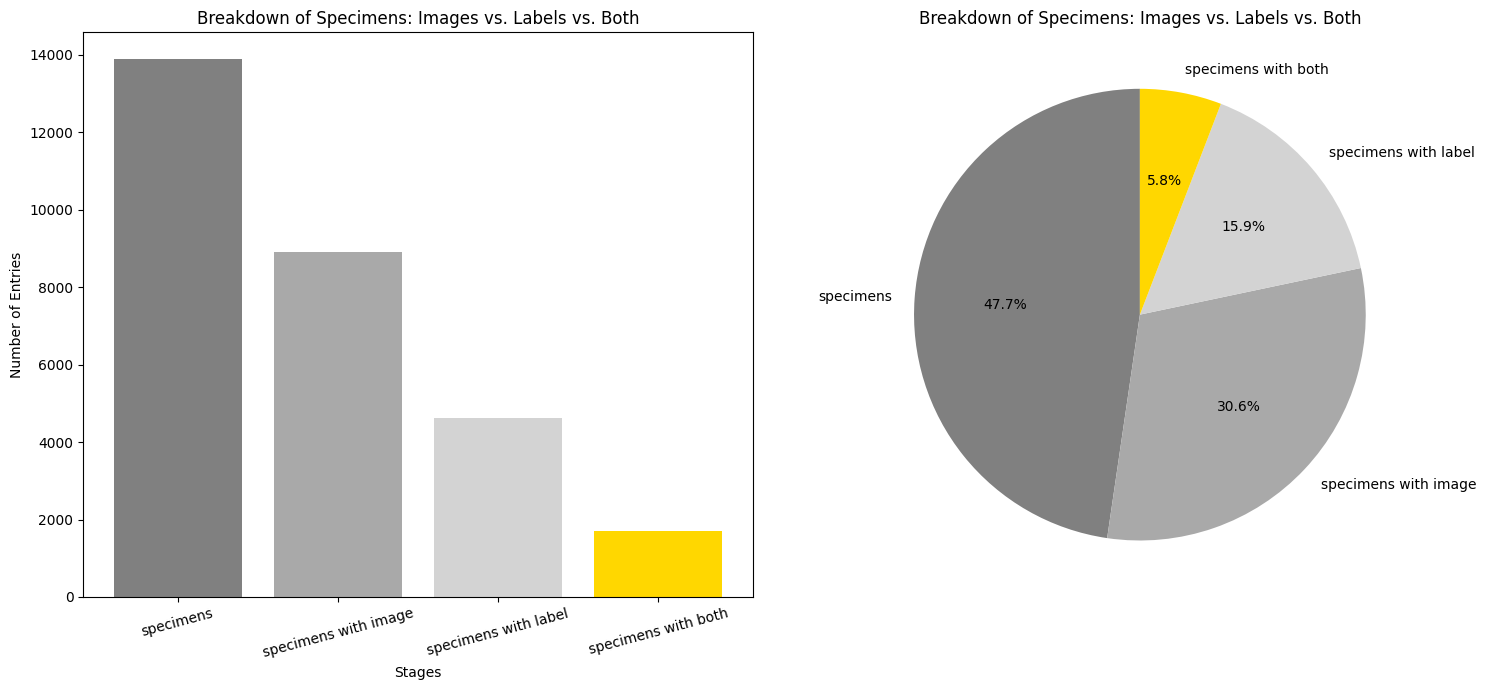

In [120]:
lengths = [specimens_, specimens_w_img, specimens_w_label, specimens_w_imglabel]
categories = ["specimens", "specimens with image", "specimens with label", "specimens with both"]

fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15.5,7))

axis_1.bar(categories, lengths, color=['gray', 'darkgray', 'lightgray', 'gold'])
axis_1.set_xlabel('Stages')
axis_1.set_ylabel('Number of Entries')
axis_1.set_title('Breakdown of Specimens: Images vs. Labels vs. Both')
axis_1.set_xticklabels(categories, rotation='15')

axis_2.pie(lengths, labels=categories, autopct='%1.1f%%', startangle=90, colors=['gray', 'darkgray', 'lightgray', 'gold'])
axis_2.set_title('Breakdown of Specimens: Images vs. Labels vs. Both')

plt.tight_layout()
plt.show()

# Findings


- From the five excel files we downloaded, only three of the tables have information that is relevant for what we wanted to know:
    - measurementOrFact.csv
    - occurences.csv
    - multimedia.csv
     <br/><br/> 
- From the first two tables, we gathered the IDs of the specimens that had a label. Then we figured out which had an image. Last, we figured out which had both an image and a label. We had a total of:
    - 13,887 specimens (across all .CSV files)
    - 8,919 specimens (that have an image)
    - 4,616 specimen (that have a phenological label)
    - 1,701 specimens (that have an image **AND** a phenological label)
    
  **Note**: There are some specimens that have a phenological label but do not have an image. Also, since all the specimens that have an image associated with it are already in one .CSV file, we'll use the "requests" library to download them.
 
<p>&nbsp;</p>

# Downloading Images


- The following R script is credited to Katelin Pearson, a member of the Symbiota Support Hub ([symbiota.org](https://symbiota.org/)). The Symbiota Support Hub offers assistance to both users and developers of the open-source biodiversity data management software, Symbiota. This software enables networks such as the Intermountain Regional Herbarium Network and other herbaria to host their specimen images. We will utilize this script as a template to translate it into Python code. The original code is shared under the Creative Commons Attribution license (CC-BY) and we will provide appropriate attribution in line with this license.

<p>&nbsp;</p>

  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**title**: Batch Download Images from CSV File  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**author**: Katelin (Katie) Pearson  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**contact**: katelin.d.pearson24@gmail.com  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**date**: May 10, 2023  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**details**: This script was developed to help users batch download images from CSV files (particularly Darwin Core files). The "multimedia.csv" file can be 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;found in DwC-As and the url can be found in the accessURI column/field.  


<p>&nbsp;</p>


```
library(utils)
library(stringr)

#Define input file
##The only requirement is that the "accessURI" column must contain the
##URL from which you would like to download the images

imgs <- read.csv("C:/Users/kdpearso/Desktop/DwC/multimedia.csv")

#Define download location (folder where the images will be placed)

location <- "C:/Users/kdpearso/Desktop/DownloadedImages/"

#In this download, the images will automatically be named according to the
##name of the originating file.
for(i in 1:dim(imgs)[1]){
  download.file(imgs$accessURI[i], paste(location,str_extract(imgs$accessURI[i], "([^/]+$)"),sep=""),
                cacheOK = FALSE, mode = "wb")
}

        
```  
<p>&nbsp;</p>  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Note**: Images sourced from the Intermountain Regional Herbarium Network are licensed under the Creative Commons Attribution Share-Alike (CC-BY-NC- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SA) license. This permits redistribution and reuse for non-commercial purposes, provided the original creator is appropriately credited and derivative &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;works are distributed under a license that is the same, similar or compatible. For detailed terms of data usage, please refer to the Intermountain Biota's &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;usage policy, which can be found [here](https://intermountainbiota.org/portal/includes/usagepolicy.php#images).

In [121]:
# Find our current path
!pwd

/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data


### Batch Download Images from CSV File (in Python):

In [122]:
# # We don't want to hit a rate limit when making requests to a server so we need to import "time" library to add a buffer 
# # between every request
# import time

# # Define input file based on our path
# imgs = pd.read_csv("/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/multimedia.csv")

# # Define download location (folder where the images will be placed)
# location = "/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/downloaded images2/"

# # Set to keep track of processed coreids
# processed_coreids = set()

# # Starting from the xth row
# for _, row in imgs.iloc[0:].iterrows():
#     coreid = row['coreid']

#     # If this coreid has been processed, skip to the next row
#     if coreid in processed_coreids:
#         continue

#     # Otherwise, add this coreid to the set
#     processed_coreids.add(coreid)
#     url = row['accessURI']

#     # Extract the file extension from the URL (e.g., .jpg, .png) or if not found, default to .jpg
#     file_extension = os.path.splitext(url)[1]
    
#     if not file_extension:
#         file_extension = ".jpg"

#     # Form the filename using 'coreid' and the file extension
#     filename = os.path.join(location, f"{coreid}{file_extension}")
    
#     response = requests.get(url, stream=True)
#     with open(filename, 'wb') as out_file:
#         out_file.write(response.content)
    
#     # 2 second delay before our next request
#     time.sleep(2)

# Displaying Images

- After downloading all of our images, we will inspect a small sample (1000) that we know aren't corrupted and in .jpg format.

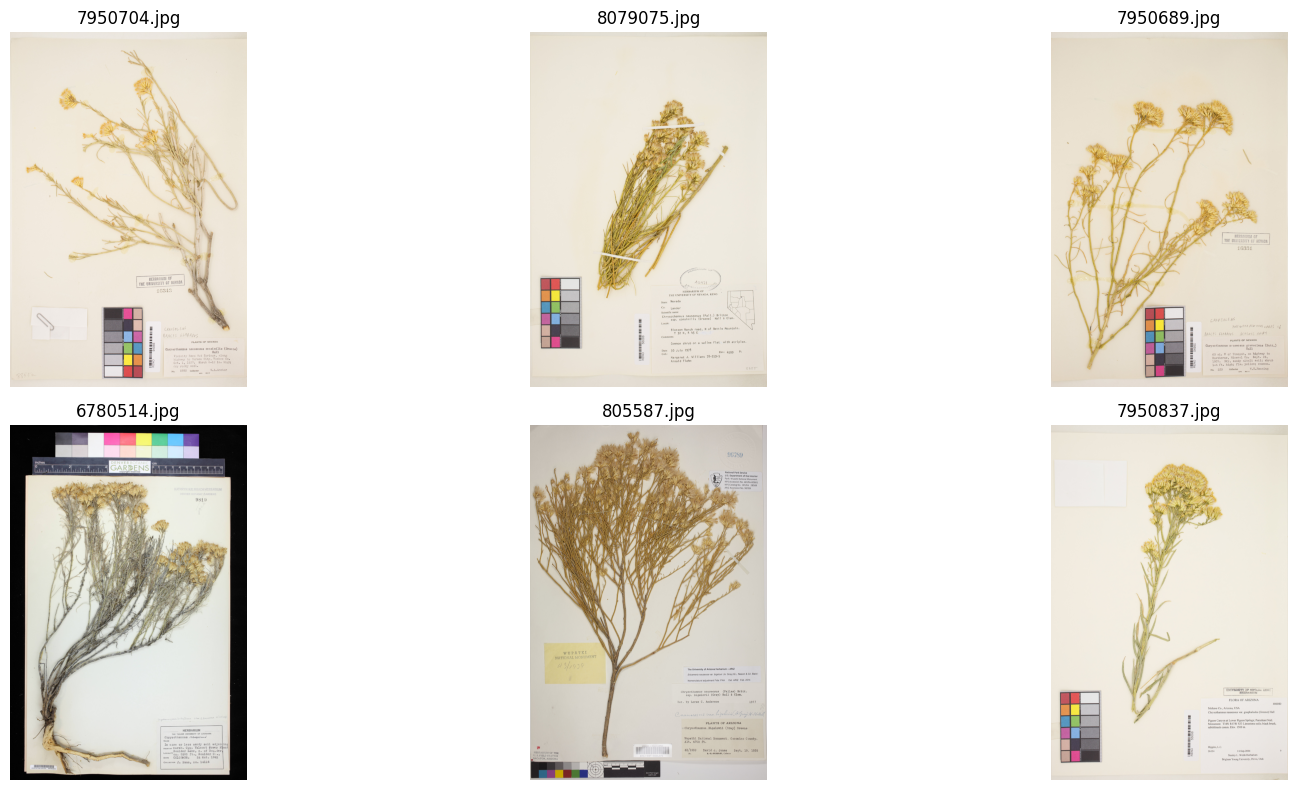

In [123]:
# Use the path to the directory where we have our images
image_dir = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/sample downloaded images'
all_files = os.listdir(image_dir)

# We pick 6 random images from our sample directory
random_images = random.sample(all_files, 6)

# We display the 6 images
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for ax, image in zip(axes.ravel(), random_images):
    img = mpimg.imread(os.path.join(image_dir, image))
    ax.imshow(img)
    ax.set_title(image)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Finding corrupted and invalid Images
- During our download process, some images were corrupted and/or downloaded in a different file format. We'd like to determine wich images aren't usable. We'll do this using the Pillow library, specifically designed for image processing.

In [124]:
import os
from PIL import Image

original_directory = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/downloaded images'
corrupted_directory = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/bad images'

for filename in os.listdir(original_directory):
    filepath = os.path.join(original_directory, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
        try:
            with Image.open(filepath):
                pass  
        except Exception:
            new_filepath = os.path.join(corrupted_directory, filename)
            os.rename(filepath, new_filepath)
            

print("Number of corrupted/invalid images: " + str(len(os.listdir(corrupted_directory))))

/home/johnbaguinaga/.local/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
/home/johnbaguinaga/.local/lib/python3.7/site-packages/PIL/Image.py:3179: DecompressionBombWarning: Image size (101082464 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Number of corrupted/invalid images: 1221


In [125]:
# Some images download as PHP files and other extensions. If the file names do not follow the format "<Number>.jpg", we
# move them into the "bad images" folder. Now we know our images are all the same format and useable for transfer learning.
# We can iterate and fix the corrupt images at another time

import re

pattern = re.compile(r'^\d+\.jpg$')

for filename in os.listdir(original_directory):
    if not pattern.match(filename):

        src_path = os.path.join(source_dir, filename)
        dest_path = os.path.join(corrupted_directory, filename)

        with open(src_path, 'rb') as fsrc:
            with open(dest_path, 'wb') as fdst:
                fdst.write(fsrc.read())
        
        os.remove(src_path)

print("Number of corrupted/invalid images: "+ str(len(os.listdir(corrupted_directory))))

Number of corrupted/invalid images: 1221


# Finding Size and Resolution  
  - Not all of our images are the same size or have the same general look. We're going to get an idea of sizes and resolution of our images.

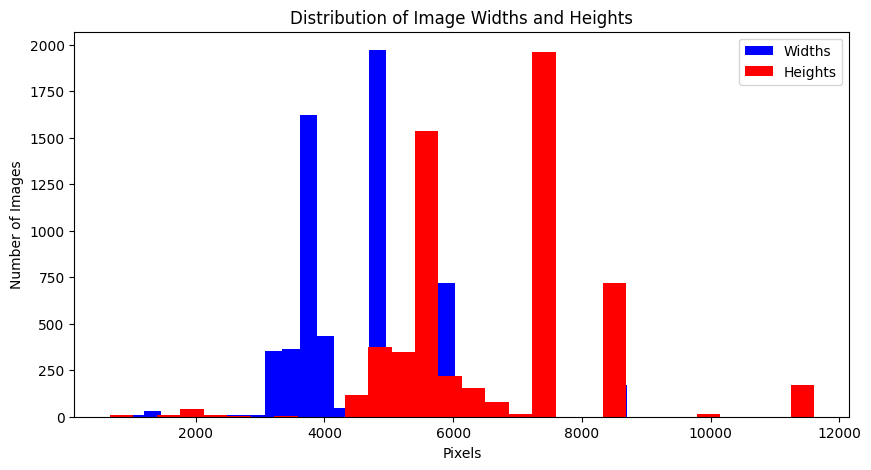

In [126]:
widths = []
heights = []

for filename in os.listdir(original_directory):
    if filename.endswith(".jpg"):
        with Image.open(os.path.join(original_directory, filename)) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(widths, color='blue', bins=30, label='Widths')
plt.hist(heights, color='red', bins=30, label='Heights')
plt.title('Distribution of Image Widths and Heights')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

# Color Format
   - We check to see that all images are in RGB format and we'll convert them if they aren't

In [127]:
# Converting all images in the specified directory to RGB
for filename in os.listdir(original_directory):
    file_path = os.path.join(original_directory, filename)

    with Image.open(file_path) as img:
        if img.mode != 'RGB':
            rgb_img = img.convert('RGB')
            rgb_img.save(file_path)

In [128]:
# Checking to see if they ALL are in RGB format and if not we print the filename
for filename in os.listdir(original_directory):
    file_path = os.path.join(original_directory, filename)

    with Image.open(file_path) as img:
        if img.mode != 'RGB':
            print(f"Image not in RGB format: {filename}")
            
print("All images in RGB format")

All images in RGB format


# Fixing Labels
   - Since we have a variety of labels for the phenological stage but are only going to categorize based on 4 criteria, we need to map the categories into one of four labels

In [129]:
# Let's look at all our unique phenological stage annotations again
df['reproductiveCondition'].value_counts(ascending=False)

flowers                                                                                             791
flowering                                                                                           748
NotDetermined                                                                                       689
flowering and fruiting                                                                              662
Flowering                                                                                           411
Flowering & Fruiting                                                                                177
fruiting                                                                                            136
Flowers Present                                                                                     124
FL                                                                                                  124
Flr & Frt                                                       

In [130]:
# Creating list of different phenological stage annotations
phen_stages = list(df['reproductiveCondition'].unique())
phen_stages = phen_stages[:]
print(phen_stages)

[nan, 'fruit', 'flowers & fruit', 'flowers', 'sterile', 'Flowering', 'flo', 'Unknown', 'fl. & fr.', 'fru', 'veg', 'Flowering & Fruiting', 'Fruiting', 'Sterile', 'Buds', 'Buds only', 'Fertile', 'Remnants', 'Reproductive', 'flower & fruit', 'flowering', 'flowering and fruiting', 'fruiting', 'vegetative', 'buds', 'Vegetative', 'flower', 'flw', 'ff', 'Budding', 'Flowers', 'Flower & Fruit', 'Flower', 'flower and fruit', 'in bloom, fruit-bearing', 'fruit-bearing', 'Fruit', 'Flower.', 'In bloom, fruit-bearing', 'Flowering and Fruiting', 'Flowering and Fruiting.', 'Fruiting and flowering', 'Flowering.', 'flowers and fruit', 'Flower and fruit', 'Early-flower.', 'bud', 'Past fruiting', 'fruiting?', 'Flowering & fruiting', 'fl-fr', 'fl', 'fr', 'fl buds', 'Mid-flower.', 'fruits', 'flowers and fruits', 'Flr & Frt', 'Frt', 'Flr', 'Veg', 'Flowers budding', 'Fl', 'Flowering or fruiting', 'Some individuals flowering, some with fruit developing, some with fruit developed and dispersing', 'Mature/ Immatu

In [131]:
# Creating the function that will map our categories into one of four
def categorize(entry):
    entry = str(entry)
    entry = entry.lower()
    if entry is None or entry == '':
        return None 
    
    if 'flowering' in entry or 'flower' in entry or 'flowers' in entry or 'flr' in entry or 'fl' in entry or 'flo' in entry or 'flw' in entry or 'fl.' in entry or 'in flower' in entry or 'in bloom' in entry or 'flr/frt' in entry or 'ff' in entry or 'ffl' in entry or 'flr & frt' in entry or 'fl-fr' in entry or 'flr.' in entry or 'flower.' in entry or 'flr and frt' in entry or 'flowers budding' in entry or 'early-flower.' in entry or 'mid-flower.' in entry or 'flr + frt' in entry:
        return 'Flowering'
    if 'budding' in entry or 'bud' in entry or 'buds' in entry or 'blooms' in entry or 'in bud' in entry or 'in early bud' in entry:
        return 'Blossoming'
    if 'fruiting' in entry or 'fruit' in entry or 'frt' in entry or 'fru' in entry or 'fr' in entry or 'fruits' in entry or 'fr.' in entry or 'fruit.' in entry or 'fruit-bearing' in entry or 'fruiting.' in entry or 'fruits only' in entry or 'fertile' in entry:
        return 'Seeding'
    if 'notdetermined' in entry or 'unknown' in entry or 'unk' in entry or 'no data' in entry or 'sterile' in entry or 'vegetative' in entry or 'veg' in entry or 'v,' in entry or 'past fruiting' in entry:
        return 'Not Flowering'

# Applying our function to our phenological stage column
df['reproductiveCondition'] = df['reproductiveCondition'].apply(categorize)

In [132]:
df['reproductiveCondition'].value_counts()

Flowering        4020
Not Flowering     800
Seeding           359
Blossoming        121
Name: reproductiveCondition, dtype: int64

In [133]:
# Ordering our list of specimen IDs with an image and a label from least to greatest (per order in excel file)
ls_with_img.sort()
ls_with_img

[222155,
 232204,
 722967,
 723001,
 723016,
 723043,
 730707,
 730708,
 730709,
 805586,
 805602,
 999922,
 1023407,
 1047184,
 1047185,
 1047187,
 1047205,
 1047216,
 1047217,
 1047218,
 1047221,
 1047222,
 1047223,
 1047224,
 1047225,
 1047233,
 1047236,
 1047237,
 1047239,
 1047243,
 1047248,
 1047249,
 1069669,
 1069673,
 1082071,
 1082078,
 1082080,
 1082087,
 1097245,
 1097255,
 1097256,
 1097257,
 1097258,
 1097259,
 1097260,
 1097261,
 1097262,
 1097263,
 1097264,
 1097265,
 1137373,
 1137400,
 1138122,
 1138233,
 1167447,
 1167471,
 1181285,
 1181411,
 1185517,
 1185734,
 1185790,
 1185923,
 1186147,
 1186845,
 1187318,
 1189394,
 1269637,
 1269935,
 1270027,
 1270031,
 1270104,
 1270210,
 1271121,
 1301395,
 1301406,
 1305115,
 1305945,
 1307567,
 1307981,
 1308046,
 1308078,
 1308660,
 1308934,
 1308960,
 1308982,
 1309022,
 1309055,
 1309364,
 1309570,
 1309765,
 1309975,
 1310036,
 1310216,
 1310300,
 1310467,
 1314709,
 1315664,
 1315938,
 1317178,
 1317368,
 1317422,
 1

In [135]:
# Recall that we only had 1701 images that had BOTH images and labels BUT we want to see which of those ~1700 images are
# in which category
print(len(ls_with_img))

1701


In [136]:
# We make a dictionary with the rows in our dataframe that also have their id in "ls_with_img"
specimen_label_dict = {row['id']: row['reproductiveCondition'] for index, row in df.iterrows() if row['id'] in ls_with_img}
# Getting rid of any empty values
specimen_label_dict = {k: v for k, v in specimen_label_dict.items() if v is not None}

labels = list(specimen_label_dict.values())
label_counts = Counter(labels)

for label, count in label_counts.items():
    print(label + ": " + str(count))

Flowering: 1469
Seeding: 162
Not Flowering: 28
Blossoming: 39


In [90]:
# # Moving our images that we'll be using into a new folder
# import shutil

# file_list = ls_with_img
# file_list = [str(name) + '.jpg' for name in file_list]

# source_folder = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/downloaded images'
# destination_folder = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/images'

# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)

# for file_name in os.listdir(source_folder):
#     if file_name in file_list:
#         source_file = os.path.join(source_folder, file_name)
#         destination_file = os.path.join(destination_folder, file_name)
        
#         shutil.move(source_file, destination_file)
#         print(f"Moved: {file_name}")

# print("Finished moving files.")

Moved: 1023407.jpg
Moved: 1047184.jpg
Moved: 1047185.jpg
Moved: 1047187.jpg
Moved: 1047205.jpg
Moved: 1047216.jpg
Moved: 1047217.jpg
Moved: 1047218.jpg
Moved: 1047221.jpg
Moved: 1047222.jpg
Moved: 1047223.jpg
Moved: 1047224.jpg
Moved: 1047225.jpg
Moved: 1047233.jpg
Moved: 1047236.jpg
Moved: 1047237.jpg
Moved: 1047239.jpg
Moved: 1047243.jpg
Moved: 1047248.jpg
Moved: 1047249.jpg
Moved: 1069669.jpg
Moved: 1069673.jpg
Moved: 1082071.jpg
Moved: 1082078.jpg
Moved: 1082080.jpg
Moved: 1082087.jpg
Moved: 1097245.jpg
Moved: 1097255.jpg
Moved: 1097256.jpg
Moved: 1097257.jpg
Moved: 1097258.jpg
Moved: 1097259.jpg
Moved: 1097260.jpg
Moved: 1097261.jpg
Moved: 1097262.jpg
Moved: 1097263.jpg
Moved: 1097264.jpg
Moved: 1097265.jpg
Moved: 11267503.jpg
Moved: 11611295.jpg
Moved: 11661696.jpg
Moved: 12398224.jpg
Moved: 12567720.jpg
Moved: 12567756.jpg
Moved: 12576995.jpg
Moved: 12609885.jpg
Moved: 12764991.jpg
Moved: 12919896.jpg
Moved: 13217210.jpg
Moved: 13258193.jpg
Moved: 13343510.jpg
Moved: 13415984.jp

Moved: 28592891.jpg
Moved: 28592913.jpg
Moved: 28592976.jpg
Moved: 28592987.jpg
Moved: 28595203.jpg
Moved: 28596454.jpg
Moved: 28597398.jpg
Moved: 28597399.jpg
Moved: 28599635.jpg
Moved: 28599796.jpg
Moved: 28602027.jpg
Moved: 28602630.jpg
Moved: 28603862.jpg
Moved: 28603986.jpg
Moved: 28606473.jpg
Moved: 28607611.jpg
Moved: 28607612.jpg
Moved: 28607613.jpg
Moved: 28607614.jpg
Moved: 28607615.jpg
Moved: 28607616.jpg
Moved: 28607618.jpg
Moved: 28607619.jpg
Moved: 28607620.jpg
Moved: 28607621.jpg
Moved: 28607622.jpg
Moved: 28607623.jpg
Moved: 28607624.jpg
Moved: 28607625.jpg
Moved: 28607626.jpg
Moved: 28607627.jpg
Moved: 28607629.jpg
Moved: 28607630.jpg
Moved: 28607631.jpg
Moved: 28612706.jpg
Moved: 28616253.jpg
Moved: 28617667.jpg
Moved: 28622648.jpg
Moved: 28657054.jpg
Moved: 28700782.jpg
Moved: 28710389.jpg
Moved: 28710390.jpg
Moved: 28715466.jpg
Moved: 28720683.jpg
Moved: 28721293.jpg
Moved: 28722287.jpg
Moved: 28725388.jpg
Moved: 28725389.jpg
Moved: 28726151.jpg
Moved: 28728430.jpg


In [137]:
folder_path = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/images'

#specimen_label_dict

files_in_folder = set(os.listdir(folder_path))

# Create a copy of the dictionary keys to iterate over
dict_keys = list(specimen_label_dict.keys())

# Check each entry in the dictionary
for image_key in dict_keys:
    image_name = str(image_key) + '.jpg'
    if image_name not in files_in_folder:
        # Remove entry from dictionary if the corresponding file doesn't exist in the folder
        del specimen_label_dict[image_key]

Updated dictionary: {222155: 'Flowering', 232204: 'Flowering', 722967: 'Flowering', 723001: 'Flowering', 723016: 'Flowering', 723043: 'Flowering', 730707: 'Seeding', 730708: 'Seeding', 730709: 'Seeding', 999922: 'Flowering', 1023407: 'Flowering', 1047184: 'Flowering', 1047185: 'Flowering', 1047187: 'Flowering', 1047205: 'Flowering', 1047216: 'Flowering', 1047217: 'Flowering', 1047218: 'Flowering', 1047221: 'Flowering', 1047222: 'Flowering', 1047223: 'Flowering', 1047224: 'Flowering', 1047225: 'Flowering', 1047233: 'Flowering', 1047236: 'Flowering', 1047237: 'Flowering', 1047239: 'Flowering', 1047243: 'Flowering', 1047248: 'Flowering', 1047249: 'Not Flowering', 1069669: 'Flowering', 1069673: 'Flowering', 1082071: 'Flowering', 1082078: 'Flowering', 1082080: 'Flowering', 1082087: 'Flowering', 1097245: 'Flowering', 1097255: 'Seeding', 1097256: 'Flowering', 1097257: 'Flowering', 1097258: 'Flowering', 1097259: 'Flowering', 1097260: 'Flowering', 1097261: 'Flowering', 1097262: 'Flowering', 109

In [143]:
# One hot encoding our dictionary
categories = ['Flowering', 'Not Flowering', 'Blossoming', 'Seeding']
category_to_number = {category: i for i, category in enumerate(categories)}

In [144]:
def convert_to_one_hot(label, num_categories):
    one_hot = [0] * num_categories
    label_number = category_to_number[label]
    one_hot[label_number] = 1
    return one_hot

# Convert sample labels to one-hot
specimen_label_dict = {key: convert_to_one_hot(label, len(categories)) for key, label in specimen_label_dict.items()}

In [145]:
print("Category to Number Mapping:", category_to_number)
print("\nSample One-Hot Encoded Labels:")
for key, one_hot in specimen_label_dict.items():
    print(f"{key}: {one_hot}")

Category to Number Mapping: {'Flowering': 0, 'Not Flowering': 1, 'Blossoming': 2, 'Seeding': 3}

Sample One-Hot Encoded Labels:
222155: [1, 0, 0, 0]
232204: [1, 0, 0, 0]
722967: [1, 0, 0, 0]
723001: [1, 0, 0, 0]
723016: [1, 0, 0, 0]
723043: [1, 0, 0, 0]
730707: [0, 0, 0, 1]
730708: [0, 0, 0, 1]
730709: [0, 0, 0, 1]
999922: [1, 0, 0, 0]
1023407: [1, 0, 0, 0]
1047184: [1, 0, 0, 0]
1047185: [1, 0, 0, 0]
1047187: [1, 0, 0, 0]
1047205: [1, 0, 0, 0]
1047216: [1, 0, 0, 0]
1047217: [1, 0, 0, 0]
1047218: [1, 0, 0, 0]
1047221: [1, 0, 0, 0]
1047222: [1, 0, 0, 0]
1047223: [1, 0, 0, 0]
1047224: [1, 0, 0, 0]
1047225: [1, 0, 0, 0]
1047233: [1, 0, 0, 0]
1047236: [1, 0, 0, 0]
1047237: [1, 0, 0, 0]
1047239: [1, 0, 0, 0]
1047243: [1, 0, 0, 0]
1047248: [1, 0, 0, 0]
1047249: [0, 1, 0, 0]
1069669: [1, 0, 0, 0]
1069673: [1, 0, 0, 0]
1082071: [1, 0, 0, 0]
1082078: [1, 0, 0, 0]
1082080: [1, 0, 0, 0]
1082087: [1, 0, 0, 0]
1097245: [1, 0, 0, 0]
1097255: [0, 0, 0, 1]
1097256: [1, 0, 0, 0]
1097257: [1, 0, 0, 0]
10

In [149]:
len(specimen_label_dict)

1089

In [150]:
# specimen_label_dict

image_dir = '/mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/images'

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):  
        file_key = int(os.path.splitext(filename)[0])  

        if file_key not in specimen_label_dict:
            file_path = os.path.join(image_dir, filename)
            print(f"Deleting file: {file_path}")
            os.remove(file_path)

Deleting file: /mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/images/16482462.jpg
Deleting file: /mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/images/805586.jpg
Deleting file: /mnt/c/users/John/Desktop/Capstone Project Files/Capstone Project Data/images/805602.jpg
File cleanup complete.


In [151]:
# specimen_label_dict

image_keys = set()
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'): 
        file_key = int(os.path.splitext(filename)[0])
        image_keys.add(file_key)

keys_to_remove = [key for key in specimen_label_dict if key not in image_keys]

for key in keys_to_remove:
    del specimen_label_dict[key]

print("Dictionary cleanup complete. Removed keys:", keys_to_remove)

Dictionary cleanup complete. Removed keys: []


# Class Imbalance and Noisy Data
  - Since we are looking to classify unlabeled specimens of rubber rabbitbrush with a high degree of certainty, we need to be sure any drawback in our methods are properly addressed. Large discrepancies between the amount of samples in each class or one class having substantially more samples than the rest makes our dataset effectively "unbalanced". Although a model can be trained on and even yield high accuracy on unbalanced data, the results can be misleading.
     <br><br/>
   - Another concern for our dataset is that the images tend to have a lot of "noise" or meaningless information in the context of identifying our target value. In our case, this means our specimens tend to have some unnecessary objects that aren't going to help us identify their phenological stage or at worst, decrease our accuracy to properly label our specimens.
     <br><br/>
   - For the sake of time, we will deal with these issues in later iterations of our model(s).

In [152]:
# Storing our variables that we may need for transfer learning in a different notebook
%store ls_with_img
%store specimen_label_dict
%store df

Stored 'ls_with_img' (list)
Stored 'specimen_label_dict' (dict)
Stored 'df' (DataFrame)
